### This File is related to derive risk score of earthquake intenisty of route of nakagawa region.

In [21]:
import geopandas as gpd
import shapely
import osmnx as ox
import folium
from shapely.ops import nearest_points
from shapely import wkt
from shapely import geometry

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
G_nakagawa = ox.graph_from_bbox(35.109901,35.167973,136.898682,136.797307,network_type='drive')
nodes_box,edges_box = ox.graph_to_gdfs(G_nakagawa)

<AxesSubplot:>

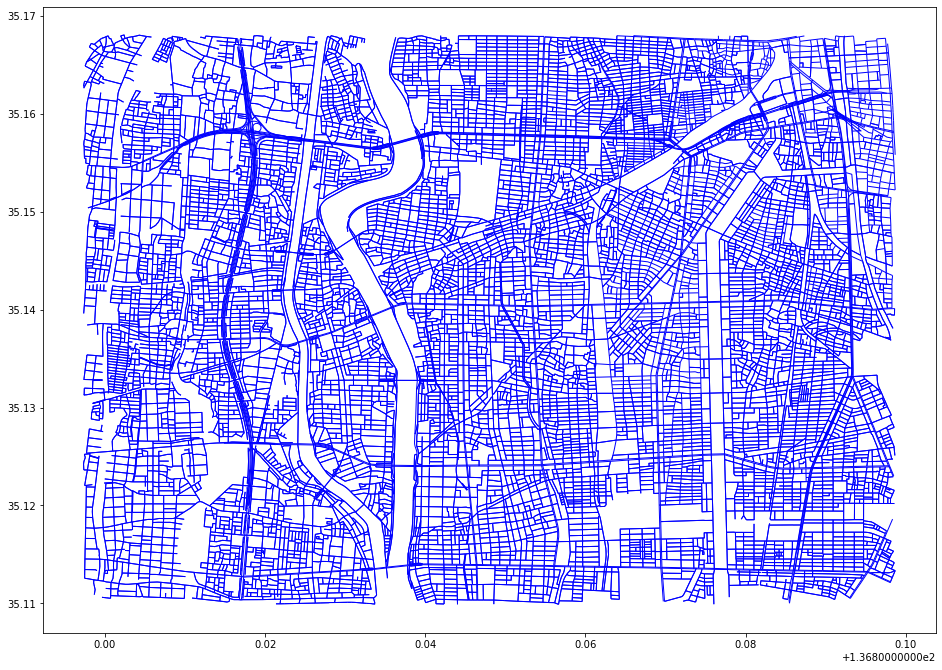

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,18))

edges_box.plot(ax=ax, linewidth=1, edgecolor='b')

In [4]:
edges_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
earthquake=gpd.read_file('D:/Projects/Japan Path Estimation/nakagawa_probability_hazard.zip')
earthquake.head()

,CODE,T30_I45_PS,T30_I50_PS,T30_I55_PS,T30_I60_PS,T30_P03_SI,T30_P03_BV,T30_P03_SV,T30_P06_SI,T30_P06_BV,...,T50_P05_SI,T50_P05_BV,T50_P05_SV,T50_P10_SI,T50_P10_BV,T50_P10_SV,T50_P39_SI,T50_P39_BV,T50_P39_SV,geometry
0,5236563624,0.943254,0.829926,0.677785,0.304250,6.5,88.877,170.013,6.4,75.992,...,6.4,83.979,160.644,6.3,71.000,135.817,5.9,43.900,83.976,"POLYGON ((136.83594 35.11179, 136.83564 35.112..."
1,5236563642,0.944194,0.831062,0.679853,0.308073,6.5,88.877,171.044,6.4,75.992,...,6.4,83.979,161.618,6.3,71.000,136.640,6.0,43.900,84.485,"POLYGON ((136.83646 35.11250, 136.83564 35.112..."
2,5236563643,0.943960,0.830778,0.679337,0.307117,6.5,88.877,170.786,6.4,75.992,...,6.4,83.979,161.374,6.3,71.000,136.434,6.0,43.900,84.358,"POLYGON ((136.83384 35.11667, 136.83437 35.116..."
3,5236563644,0.948650,0.836751,0.689801,0.326478,6.5,88.877,176.136,6.4,75.992,...,6.5,83.979,166.430,6.3,71.000,140.708,6.0,43.900,87.001,"POLYGON ((136.83437 35.11543, 136.83437 35.116..."
4,5236563731,0.942983,0.829588,0.678929,0.306150,6.5,89.248,170.168,6.4,76.350,...,6.4,84.339,160.810,6.3,71.348,136.038,6.0,44.186,84.250,"POLYGON ((136.83750 35.11394, 136.83750 35.114..."


In [22]:
earthquake['centroid']=earthquake.geometry.centroid

In [23]:
earthquake.head(3)

,CODE,T30_I45_PS,T30_I50_PS,T30_I55_PS,T30_I60_PS,T30_P03_SI,T30_P03_BV,T30_P03_SV,T30_P06_SI,T30_P06_BV,...,T50_P05_BV,T50_P05_SV,T50_P10_SI,T50_P10_BV,T50_P10_SV,T50_P39_SI,T50_P39_BV,T50_P39_SV,geometry,centroid
0,5236563624,0.943254,0.829926,0.677785,0.304250,6.5,88.877,170.013,6.4,75.992,...,83.979,160.644,6.3,71.0,135.817,5.9,43.9,83.976,"POLYGON ((136.83594 35.11179, 136.83564 35.112...",POINT (136.83601 35.11226)
1,5236563642,0.944194,0.831062,0.679853,0.308073,6.5,88.877,171.044,6.4,75.992,...,83.979,161.618,6.3,71.0,136.640,6.0,43.9,84.485,"POLYGON ((136.83646 35.11250, 136.83564 35.112...",POINT (136.83618 35.11373)
2,5236563643,0.943960,0.830778,0.679337,0.307117,6.5,88.877,170.786,6.4,75.992,...,83.979,161.374,6.3,71.0,136.434,6.0,43.9,84.358,"POLYGON ((136.83384 35.11667, 136.83437 35.116...",POINT (136.83420 35.11625)


In [7]:
# IJMA for a 3% Probability of exceedance within 30 years
# Above 5 there is possibility of road damage
earthquake['T30_P03_SI'].unique()

array([6.5, 6.6, 6.3, 6.2, 6.4])

In [18]:
earthequake=earthquake.set_crs(earthquake.crs)

In [24]:
type(earthquake.centroid.to_crs(earthquake.crs).unary_union)

shapely.geometry.multipoint.MultiPoint

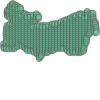

In [25]:
multipoints=earthquake.centroid.unary_union
multipoints

In [16]:
nearest_points(multipoints,edges_box.geometry.iloc[0])[0].wkt

'POINT (136.8046875000001 35.14062499999999)'

In [28]:
float(earthquake.loc[earthquake.centroid==nearest_points(multipoints,edges_box.geometry.iloc[0])[0]]['T30_P03_SI'])

6.5

In [29]:
edges_box['earthquake_risk']=0

for i in range(edges_box.shape[0]):
    #p=nearest_points(multipoints,edges_box.geometry.iloc[i])[0]  #nearest location 
    risk= float(earthquake.loc[earthquake.centroid==nearest_points(multipoints,edges_box.geometry.iloc[i])[0]]['T30_P03_SI'])
    edges_box['earthquake_risk'].iloc[i]=risk

In [32]:
edges_box['earthquake_risk'].isnull().sum()

0

In [34]:
gdf=ox.geocoder.geocode_to_gdf('Nakagawa-ku,Nagoya,Japan')

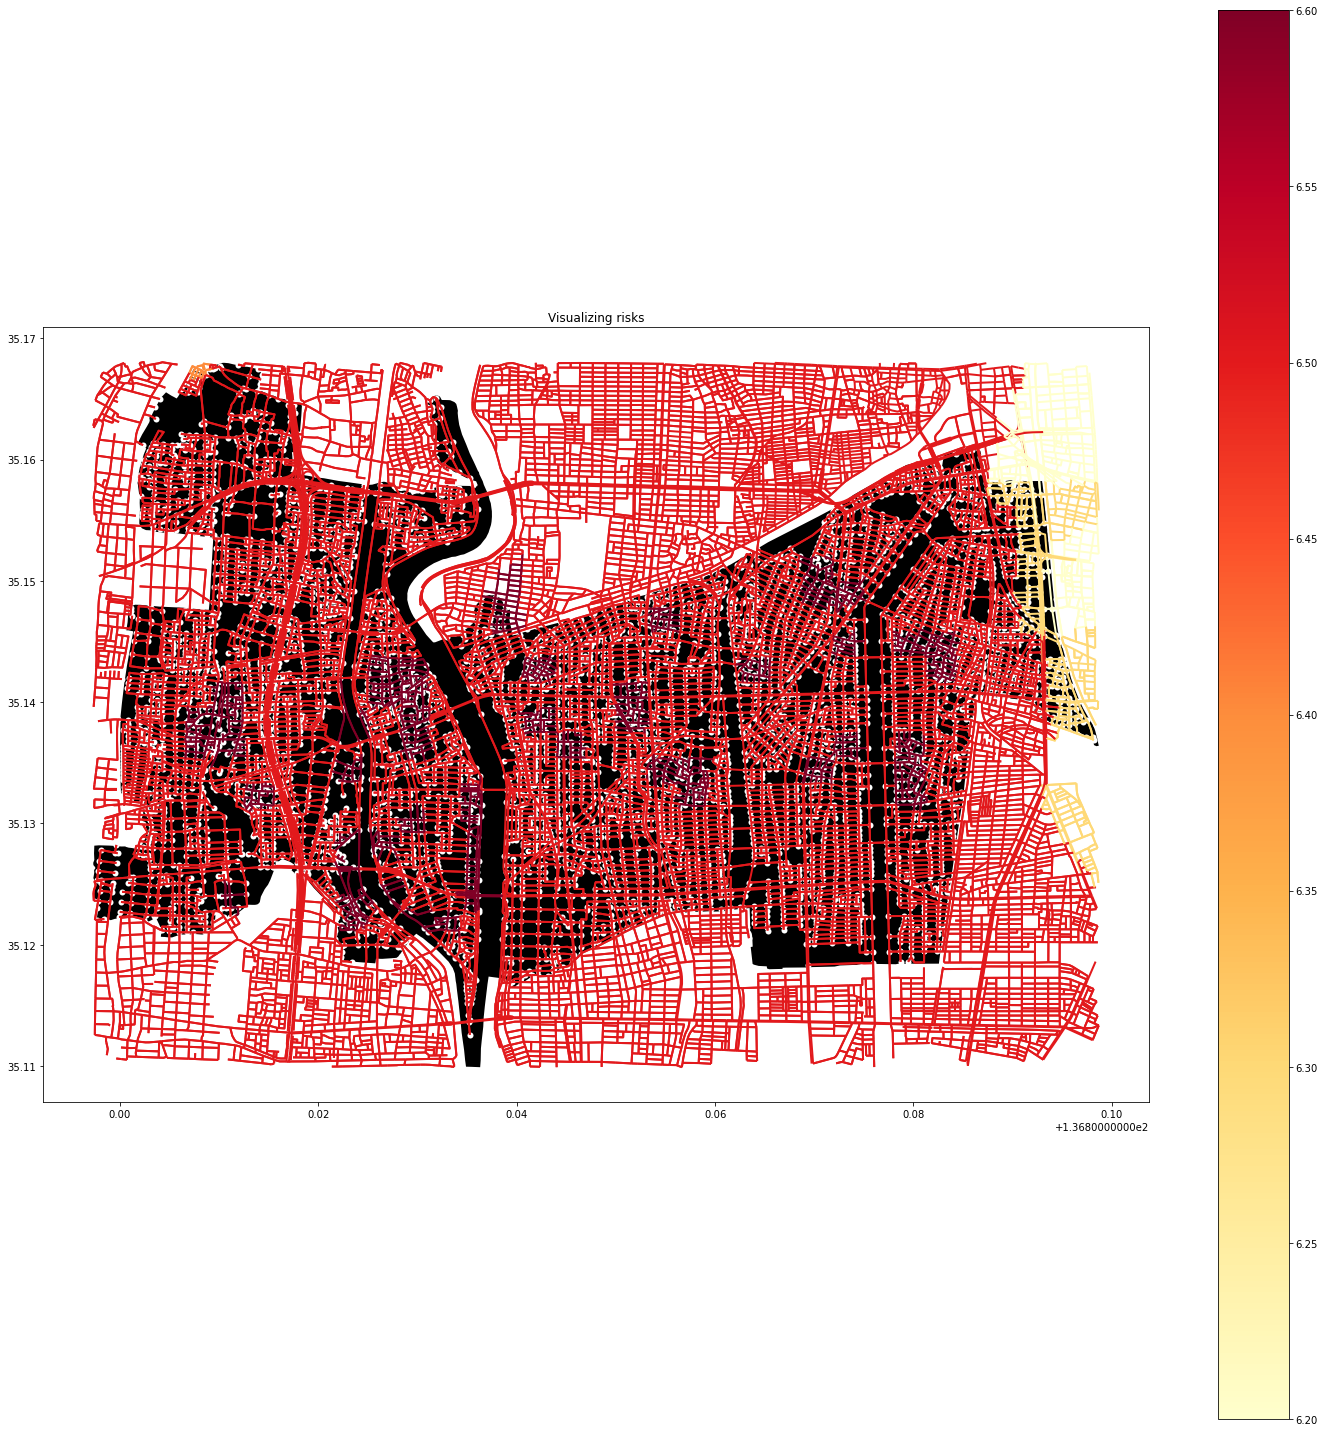

In [37]:
import matplotlib
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, facecolor='black')
edges_box.plot(ax=ax, linewidth=2, column='earthquake_risk', cmap='YlOrRd')
nodes_box.plot(ax=ax, linewidth=0, facecolor='white')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', 
                           norm = matplotlib.colors.Normalize(vmin=edges_box['earthquake_risk'].min(),
                                                              vmax=edges_box['earthquake_risk'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

In [38]:
fig.savefig('nakagawa_graph_earthquake_risk.jpg')

In [40]:
import networkx as nx
g=ox.utils_graph.graph_from_gdfs(nodes_box,edges_box)
nx.write_gpickle(g,"nakagawa_graph_earthquake_risk_addded.pickle")